## Neyman-Pearson Criterion

**MOTIVATION**. The Neyman-Pearson criterion requires neither costs nor *a priori* probabilities for its formulation. 

If **neither** costs nor *a priori* probabilities are known, the system designer's first choice should be the Neyman-Pearson criterion. 

Only if it is impossible or impractical to specify a maximum false alarm rate should the ML criterion be used.

The following table summarizes the detection criterion of interest with their associated requirements. 

Note that the ML criterion is not listed in the table, since it is more commonly used in estimation theory than in detection theory.

| **Criterion**      | **A Priori Probabilities** | **Costs** |
|--------------------|----------------------------|-----------|
| **Bayes**          | Yes                        | Yes       |
| **MAP**            | Yes                        | No        |
| **Minimax**        | No                         | Yes       |
| **Neyman-Pearson** | No                         | No        |

**APPLICATION.** Traditionally, the Neyman-Pearson (NP) criterion is used in applications where costs and *a priori* probabilities are difficult or impossible to assign, e.g., in radar-type applications.

### Maximize $P_d$ subjected to $P_f$ constraint

Typically, the false-alarm probability $ P_f $ is constrained to be below some specified level $ \alpha_f $, i.e.,

$$
P_f = \Pr(D_1|H_0) \leq \alpha_f
$$

With this constraint, the probability of detection $ P_d $ is then maximized.

**OBJECTIVE.** 
The main objective is to find a threshold $\tau_{NP}$ that maximizes $P_d$ (the probability of detection) while satisfying the constraint $P_f \leq \alpha$, where $\alpha$ is a predefined false alarm probability.

If the detected variable $ \mathbf{y} $ has a continuous conditional probability density function under both hypotheses, the derivation of the threshold $\tau_{NP}$ is as follows.

Define $ P_f $ to be some value $ \alpha' $ such that

$$
P_f := \alpha' \quad\text{where}\quad \alpha' \leq \alpha_f 
$$

where $ := $ stands for "is defined to be equal to"

Using a Lagrange multiplier $ \mu $, define a function $ F $ as

$$
\begin{align*}
F &= P_d - \mu[P_f - \alpha'] \\
&= \Pr(D_1|H_1) - \mu[\Pr(D_1|H_0) - \alpha']
\end{align*} 
$$

Note that $ P_f - \alpha' $ is not zero, it is a function minus a specific value assigned to that function.

Maximizing $ P_d $ also maximizes $ F $. 

It follows that

$$
\begin{align*}
F &= \int_{R_1} p(y|H_1) dy - \mu \int_{R_1} p(y|H_0) dy + \mu \alpha' \\
&= \int_{R_1} [p(y|H_1) - \mu p(y|H_0)] dy + \mu \alpha' 
\end{align*}
$$

**Discussion.** Note that $ F $ is not a Lagrangian function $ \mathcal{L}(\mu) $, because the problem is a maximization problem and has not yet been transformed into the standard form for minimization. 

In the Lagrangian method, problems are typically framed as minimization tasks, and the objective function needs to be appropriately modified for that purpose.

For reviewing the concept of Largrange multiplier, see [Boyd et al., Convex Optimization](https://stanford.edu/class/ee364a/lectures/duality.pdf)

#### Finding $\tau_{NP}$

Maximizing $ F $ for $ \mu > 0 $, we want to pick $ R_1 $ such that the integrand is always positive. 

That is, if

$$
p(y|H_1) - \mu p(y|H_0) \geq 0 
$$

then decide $ D_1 $. 

It follows that

$$
L(y) = \frac{p(y|H_1)}{p(y|H_0)} \geq \mu \triangleq \tau_{NP}^{temp}
$$

Again, we have a **likelihood-ratio test (LRT)**.



By definition,

$$
P_f = \Pr(D_1|H_0) = \int_{R_1(\mu)} p(y|H_0) dy = \alpha' 
$$

where we have explicitly shown the _dependence_ of the region $ R_1 $ on $ \mu $. 

Since

$$
P_d = \Pr(D_1|H_1) = \int_{R_1(\mu)} p(y|H_1) dy 
$$

i.e., both integrals of the previous two equations are over the same range $ R_1(\mu) $.

It follows that changing $ \mu $ to _increase_ $ P_d $ also tends to _increase_ $ P_f $. 

Thus, we change $ \mu $, i.e., vary the temporary threshold, $\tau_{NP}^{temp}$, until we get the largest value of $ \alpha' \leq \alpha $. 

This will then correspond to the largest value of $ P_d $, and the threshold will be $ \tau_{NP} $. 

$$
\tau_{NP} = \mu^* \triangleq \arg\max_{\mu} P_d \quad\text{subject to}\quad P_f \leq \alpha_f
$$

### Decision Rule

The decision rule for the NP criterion is somewhat more complicated. It can be stated as

$$
\delta_{NP}(y) = 
\begin{cases}
1, & L(y) > \tau_{NP} \\
\eta, & L(y) = \tau_{NP} \\
0, & L(y) < \tau_{NP}
\end{cases} 
$$

This decision rule is another example of a _randomization-rule test_. 

- If $ L(y) $ exceeds the threshold $ \tau_{NP} $, decide $ D_1 $. 
- If $ L(y) < \tau_{NP} $, decide $ D_0 $. 
- If, however, $ L(y) = \tau_{NP} $, then we make a probabilistic decision, where the probability of deciding $ D_1 $ is $ \eta $. 

The threshold $ \tau_{NP} $ (optimal threshold) and value $ \eta $ are chosen so that $ P_f = \alpha_f $.

### Example: Antipodal Signal Detection and Decision using NP Criterion

This example [B2, Ex 4.11] is a continuation of our previous examples.

In order to use the Neyman-Pearson criterion, we must specify a maximum false-alarm probability $ \alpha_f $. 

As an example, let us set $ \alpha_f = 0.1 $.

Since these examples all use a log-likelihood ratio, we must find a threshold $ \tau'_{NP} $ such that

$$
P_f = \int_{\tau'_{NP}}^\infty p(y|H_0) dy = \frac{1}{\sqrt{2\pi\sigma^2}} \int_{\tau'_{NP}}^\infty \exp \left(-\frac{(y+b)^2}{2\sigma^2}\right) dy \leq 0.1
$$

Concurrently, we want to maximize the probability of detection $ P_d $ which is

$$
P_d = \frac{1}{\sqrt{2\pi\sigma^2}} \int_{\tau'_{NP}}^\infty \exp \left(-\frac{(y-b)^2}{2\sigma^2}\right) dy
$$


It is evident that both $ P_f $ and $ P_d $ decrease as the threshold $ \tau_{NP} $ increases. 

To maximize $ P_d $, we select the threshold $ \tau_{NP} $ such that $ P_f = \alpha_f $. 

The threshold $ \tau_{NP} $ can be determined directly as the root of the equation $ P_f = \alpha_f $, without the need to derive it through the Lagrangian formulation.


Using the aforementioned values of $ b = 1 $ and $ \sigma^2 = 0.25 $, we want to find $ \tau'_{NP} $ such that

$$
\sqrt{\frac{2}{\pi}} \int_{\tau'_{NP}}^\infty \exp \left(-2(y+1)^2\right) dy = 0.1 
$$

$$
\iff \frac{1}{2} \text{erfc} \left(\sqrt{2}(\tau'_{NP} + 1)\right) = 0.1 
$$

After some computation step, e.g., using error functions, we obtain $ \tau'_{NP} \approx -0.36007 $

The NP decision rule is

$$
\delta_{NP}(y) = 
\begin{cases}
1, & y \geq -0.36007 \\
0, & y < -0.36007
\end{cases}
$$

**General form.**

In the Gaussian tail probability, using the complementary error function, for gerneral $b$ and $\sigma$, set $P_f = \alpha_f$, we have


$$
\frac{1}{2} \text{erfc} \left( \frac{\tau'_{NP} + b}{\sqrt{2\sigma^2}} \right) = \alpha_f.
$$

Next, apply the inverse complementary error function $ \text{erfc}^{-1} $:

$$
\frac{\tau'_{NP} + b}{\sqrt{2\sigma^2}} = \text{erfc}^{-1}(2\alpha_f).
$$

where $ \text{erfc}^{-1} $ is the inverse complementary error function.

Thus, we have

$$
\tau'_{NP} = -b + \sqrt{2\sigma^2} \, \text{erfc}^{-1}(2\alpha_f).
$$

### Numerical Results

We assume the setting as in previous examples, i.e., $ b = 1 $ and $ \sigma^2 = 0.25 $.

- For $ P_f $:

  $$
  P_f(\tau'_{NP}) = \frac{1}{\sqrt{2\pi\sigma^2}} \int_{\tau'_{NP}}^\infty \exp \left(-\frac{(y+b)^2}{2\sigma^2}\right) dy
  $$

- For $ P_d $:

  $$
  P_d(\tau'_{NP}) = \frac{1}{\sqrt{2\pi\sigma^2}} \int_{\tau'_{NP}}^\infty \exp \left(-\frac{(y-b)^2}{2\sigma^2}\right) dy
  $$


In [1]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.special import erfcinv

# Given values
b = 1
sigma = 0.5
alpha_f = 0.1

# Range of tau'_NP values
tau_NP_range = np.linspace(-2, 2, 500)
from scipy.integrate import quad
from scipy.special import erfc

# Mathematical expressions for P_f and P_d
def P_f_math(tau_NP):
    func = lambda y: np.exp(-(y + b)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    return quad(func, tau_NP, np.inf)[0]

def P_d_math(tau_NP):
    func = lambda y: np.exp(-(y - b)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    return quad(func, tau_NP, np.inf)[0]

# Calculate P_f and P_d using the mathematical expressions
P_f_values_math = np.array([P_f_math(tau) for tau in tau_NP_range])
P_d_values_math = np.array([P_d_math(tau) for tau in tau_NP_range])

def tau_NP_theoretical(alpha_f, b, sigma):
    # Calculate the NP threshold based on the provided alpha_f, b, and sigma
    return -b + np.sqrt(2 * sigma**2) * erfcinv(2 * alpha_f)

tau_NP_theoretical_math = tau_NP_theoretical(alpha_f, b, sigma)
tau_NP_theoretical_math
print(f"Numerical tau'_NP = {tau_NP_theoretical_math}")


Numerical tau'_NP = -0.3592242172276997


#### Plot $P_f$ and $P_d$ as a function of the decision threshold

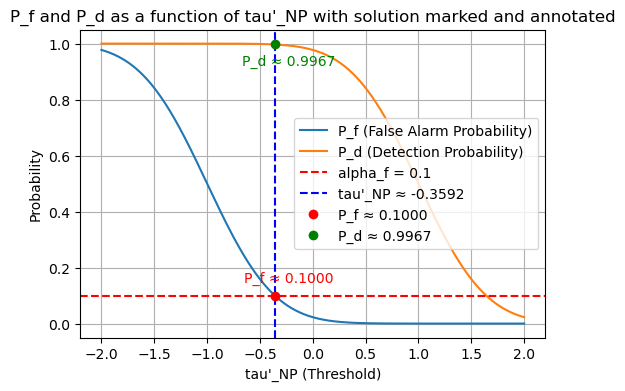

In [2]:
# Calculate corresponding P_f and P_d for the found tau'_NP
P_f_at_solution = P_f_math(tau_NP_theoretical_math)
P_d_at_solution = P_d_math(tau_NP_theoretical_math)

# Annotating the plot with the found P_f and P_d values
plt.figure(figsize=(6,4))
plt.plot(tau_NP_range, P_f_values_math, label='P_f (False Alarm Probability)')
plt.plot(tau_NP_range, P_d_values_math, label='P_d (Detection Probability)')
plt.axhline(alpha_f, color='red', linestyle='--', label='alpha_f = 0.1')
plt.axvline(tau_NP_theoretical_math, color='blue', linestyle='--', label=f'tau\'_NP ≈ {tau_NP_theoretical_math:.4f}')
plt.plot(tau_NP_theoretical_math, P_f_at_solution, 'ro', label=f'P_f ≈ {P_f_at_solution:.4f}')
plt.plot(tau_NP_theoretical_math, P_d_at_solution, 'go', label=f'P_d ≈ {P_d_at_solution:.4f}')
plt.annotate(f'P_f ≈ {P_f_at_solution:.4f}', (tau_NP_theoretical_math, P_f_at_solution), 
             textcoords="offset points", xytext=(10,10), ha='center', color='red')
plt.annotate(f'P_d ≈ {P_d_at_solution:.4f}', (tau_NP_theoretical_math, P_d_at_solution), 
             textcoords="offset points", xytext=(10,-15), ha='center', color='green')
plt.xlabel("tau'_NP (Threshold)")
plt.ylabel("Probability")
plt.title("P_f and P_d as a function of tau'_NP with solution marked and annotated")
plt.legend()
plt.grid(True)
plt.show()



#### $P_d$ as a function of $P_f$

As $ P_f $ increases, the required threshold $ \tau'_{NP} $ to maintain that false alarm rate decreases. A lower threshold means that the system is more likely to decide $ H_1 $ (i.e., detect a signal), even when the actual value of $ y $ is not very high.

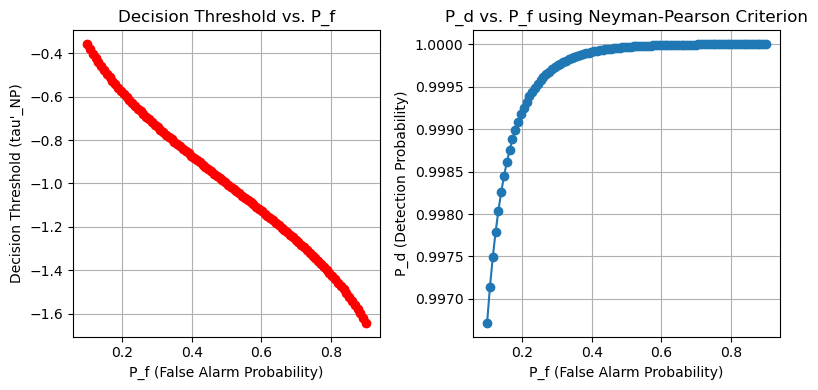

In [3]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import erfc

# Given values
b = 1
sigma = 0.5

# Mathematical expressions for P_f and P_d
def P_f_math(tau_NP):
    func = lambda y: np.exp(-(y + b)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    return quad(func, tau_NP, np.inf)[0]

def P_d_math(tau_NP):
    func = lambda y: np.exp(-(y - b)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    return quad(func, tau_NP, np.inf)[0]

# Range of P_f values from 0.1 to 0.9
P_f_range = np.linspace(0.1, 0.9, 100)

# Calculate decision threshold tau'_NP for each P_f in the range
tau_NP_values = [tau_NP_theoretical(P_f, b, sigma) for P_f in P_f_range]

# Calculate P_d for each tau'_NP in the range
P_d_values = [P_d_math(tau_NP) for tau_NP in tau_NP_values]

# Plot P_d as a function of P_f
plt.figure(figsize=(8, 4))

plt.subplot(1, 2, 1)
plt.plot(P_f_range, tau_NP_values, marker='o', color='r')
plt.xlabel('P_f (False Alarm Probability)')
plt.ylabel("Decision Threshold (tau'_NP)")
plt.title("Decision Threshold vs. P_f")
plt.grid(True)

# Plot decision threshold tau'_NP as a function of P_f
plt.subplot(1, 2, 2)
plt.plot(P_f_range, P_d_values, marker='o')
plt.xlabel('P_f (False Alarm Probability)')
plt.ylabel('P_d (Detection Probability)')
plt.title('P_d vs. P_f using Neyman-Pearson Criterion')
plt.grid(True)

plt.tight_layout()
plt.show()



In [4]:
import numpy as np
from scipy.integrate import quad
from scipy.special import erfcinv
import matplotlib.pyplot as plt

# Given parameters
b = 1  # Signal amplitude
sigma_squared = 0.25  # Noise variance
sigma = np.sqrt(sigma_squared)
n_samples = 1000000  # Number of samples for simulation
alpha_f = 0.1  # Desired false alarm probability

# Mathematical expressions for P_f and P_d
def P_f_math(tau_NP):
    func = lambda y: np.exp(-(y + b)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    return quad(func, tau_NP, np.inf)[0]

def P_d_math(tau_NP):
    func = lambda y: np.exp(-(y - b)**2 / (2 * sigma**2)) / np.sqrt(2 * np.pi * sigma**2)
    return quad(func, tau_NP, np.inf)[0]

# Calculate tau'_NP threshold for Neyman-Pearson criterion
def tau_NP_theoretical(alpha_f, b, sigma):
    return -b + np.sqrt(2 * sigma**2) * erfcinv(2 * alpha_f)

# Calculate tau'_NP
tau_NP = tau_NP_theoretical(alpha_f, b, sigma)
print(f"Neyman-Pearson threshold tau'_NP = {tau_NP}")

# Simulate received signals and decisions based on Neyman-Pearson threshold
s0 = -b
s1 = b

# Generate noise
noise = np.random.normal(0, np.sqrt(sigma_squared), n_samples)

# Simulate received y under each hypothesis
y_given_s0 = s0 + noise  # When H0 is true
y_given_s1 = s1 + noise  # When H1 is true

# Decisions based on the Neyman-Pearson threshold
decisions_s0_NP = y_given_s0 >= tau_NP  # Decide H1 if y >= tau'_NP (for H0)
decisions_s1_NP = y_given_s1 >= tau_NP  # Decide H1 if y >= tau'_NP (for H1)

# Estimating transmitted signals (s_hat) based on decisions for Neyman-Pearson criterion
s0_hat_NP = np.where(decisions_s0_NP, s1, s0)  # Decided s1 if decision is True, else s0 (under H0)
s1_hat_NP = np.where(decisions_s1_NP, s1, s0)  # Decided s1 if decision is True, else s0 (under H1)

# Calculating empirical probabilities for Neyman-Pearson criterion
P00_NP = np.mean(s0_hat_NP == s0)  # Probability of deciding H0 when H0 is true
P01_NP = np.mean(s1_hat_NP == s0)  # Probability of deciding H0 when H1 is true
P10_NP = np.mean(s0_hat_NP == s1)  # Probability of deciding H1 when H0 is true (false alarm)
P11_NP = np.mean(s1_hat_NP == s1)  # Probability of deciding H1 when H1 is true (detection)

# Print the results
print(f"Neyman-Pearson Criterion, P00 (Decide H0 | H0 true): {P00_NP:.4f}")
print(f"Neyman-Pearson Criterion, P01 (Decide H0 | H1 true): {P01_NP:.4f}")
print(f"Neyman-Pearson Criterion, P10 (Decide H1 | H0 true): {P10_NP:.4f}")
print(f"Neyman-Pearson Criterion, P11 (Decide H1 | H1 true): {P11_NP:.4f}")

# Plot the results for P_f and P_d as a function of tau_NP
tau_NP_range = np.linspace(-2, 2, 100)
P_f_values = np.array([P_f_math(tau) for tau in tau_NP_range])
P_d_values = np.array([P_d_math(tau) for tau in tau_NP_range])


Neyman-Pearson threshold tau'_NP = -0.3592242172276997
Neyman-Pearson Criterion, P00 (Decide H0 | H0 true): 0.9007
Neyman-Pearson Criterion, P01 (Decide H0 | H1 true): 0.0032
Neyman-Pearson Criterion, P10 (Decide H1 | H0 true): 0.0993
Neyman-Pearson Criterion, P11 (Decide H1 | H1 true): 0.9968


#### Overlap of Distributions

In antipodal signaling:
- **$ H_0 $** represents the hypothesis where the signal $ s_0 = -1 $ is transmitted.
- **$ H_1 $** represents the hypothesis where the signal $ s_1 = +1 $ is transmitted.

The received signal $ y $ is affected by noise, and we model the distributions of $ y $ under each hypothesis as:
- Under $ H_0 $ (when $ b = -1 $), $ y $ follows a normal distribution centered at $ -1 $.
- Under $ H_1 $ (when $ b = +1 $), $ y $ follows a normal distribution centered at $ +1 $.

The distributions of $ y $ under $ H_0 $ (centered at $ -1 $) and $ H_1 $ (centered at $ +1 $) overlap. When the predefined $ P_f $ constraint is increased, the decision threshold is lowered. This means that more of the $ H_1 $ distribution (where $ y $ is centered around $ +1 $) will exceed the lower threshold, leading to a higher $ P_d $. Consequently, the system becomes more sensitive, allowing for better detection of the $ H_1 $ signal at the cost of an increased false alarm rate.

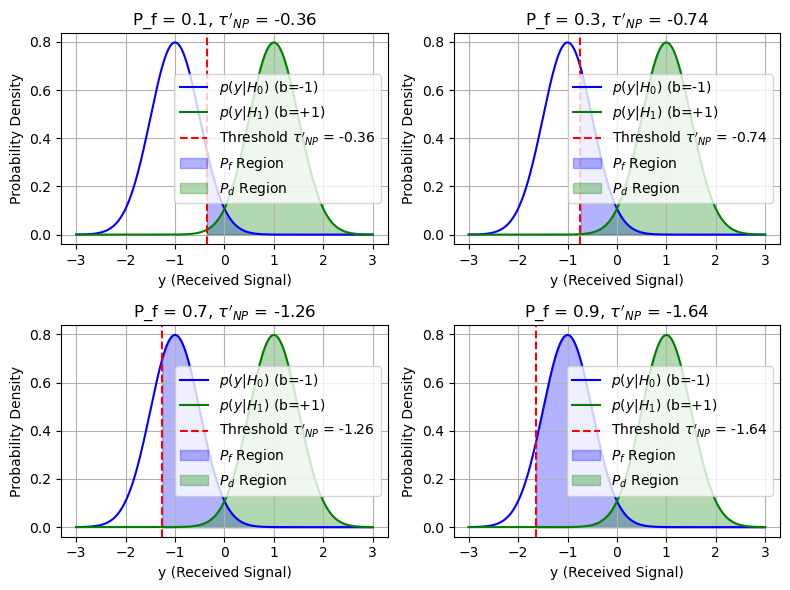

In [5]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.special import erfc

# Given values
b = 1
sigma = 0.5

# Define the range for y
y_range = np.linspace(-3, 3, 1000)

# Define the PDFs for H0 (b=-1) and H1 (b=+1)
pdf_H0 = stats.norm.pdf(y_range, loc=-b, scale=sigma)
pdf_H1 = stats.norm.pdf(y_range, loc=b, scale=sigma)

# P_f values to plot
P_f_values = [0.1, 0.3, 0.7, 0.9]

# Create subplots
fig, axs = plt.subplots(2, 2, figsize=(8, 6))

for i, P_f in enumerate(P_f_values):
    tau_NP = tau_NP_theoretical(P_f, b, sigma)
    
    ax = axs[i // 2, i % 2]
    
    # Plot the PDFs
    ax.plot(y_range, pdf_H0, label='$p(y|H_0)$ (b=-1)', color='blue')
    ax.plot(y_range, pdf_H1, label='$p(y|H_1)$ (b=+1)', color='green')

    # Plot the threshold
    ax.axvline(x=tau_NP, color='red', linestyle='--', label=f'Threshold $\\tau\'_{{NP}}$ = {tau_NP:.2f}')

    # Shade the regions for P_f and P_d
    ax.fill_between(y_range, 0, pdf_H0, where=(y_range >= tau_NP), color='blue', alpha=0.3, label='$P_f$ Region')
    ax.fill_between(y_range, 0, pdf_H1, where=(y_range >= tau_NP), color='green', alpha=0.3, label='$P_d$ Region')

    # Labels and legend
    ax.set_xlabel('y (Received Signal)')
    ax.set_ylabel('Probability Density')
    ax.set_title(f'P_f = {P_f}, $\\tau\'_{{NP}}$ = {tau_NP:.2f}')
    ax.legend()
    ax.grid(True)

plt.tight_layout()
plt.show()
